# DACS Elevator Radio Producer

In [ ]:
# Create a new conda virtual environment
#!conda create -n nlp_project7 python=3.9
#!conda activate nlp_project7

# Install all relied libraries
#!pip install -r requirements.txt

# Change the Genius API key and Spotify API keys in data/base.py and data/from_spotify.py
# Genius API key: https://docs.genius.com/
# Spotify API key: https://developer.spotify.com/documentation/web-api
# How to apply for spotify API keys: https://medium.com/@maxtingle/getting-started-with-spotifys-api-spotipy-197c3dc6353b

## Get data from billboard top 100
If this year's data is stored then it won't grab again. You can directly use them.

In [1]:
# Change this to start our journey:
address = '2016'

In [3]:
from data.base import store_lyrics

store_lyrics(year = address)

Searching for "Love Yourself" by Justin Bieber...
Done.
Searching for "Sorry" by Justin Bieber...
Done.
Searching for "One Dance" by Drake Featuring WizKid & Kyla...
Done.
Searching for "Work" by Rihanna Featuring Drake...
Done.
Searching for "Stressed Out" by twenty one pilots...
Done.
Searching for "Panda" by Desiigner...
Done.
Searching for "Hello" by Adele...
Done.
Searching for "Don't Let Me Down" by The Chainsmokers Featuring Daya...
Done.
Searching for "Can't Stop The Feeling!" by Justin Timberlake...
There's error when getting lyrcis of 'Can't Stop The Feeling!' by Justin Timberlake
Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=10)
Searching for "Closer" by The Chainsmokers Featuring Halsey...
Done.
Searching for "Cheap Thrills" by Sia Featuring Sean Paul...
Done.
Searching for "7 Years" by Lukas Graham...
Done.
Searching for "Needed Me" by Rihanna...
Done.
Searching for "My House" by Flo Rida...
Done.
Searching for "I Took A

## Get data from a playlist from spotify
### How to find playlist ID:
![playlist id](imgs/playlist_id.png)

Or if you share the playlist with link, find the string before `?si=`:  
https://open.spotify.com/playlist/**37i9dQZF1DX5Ejj0EkURtP**?si=a1e0243dd67c4cc3


In [4]:
# Change this to start our journey:
address = '4E4kp49bDhaSjyGFOyMKuz' # A playlist for Arctic Monkey

In [5]:
from data.base import store_lyrics

store_lyrics(playlist_id=address)

Searching for "Brianstorm" by Arctic Monkeys...
Done.
Searching for "Snap Out Of It" by Arctic Monkeys...
Done.
Searching for "Don't Sit Down 'Cause I've Moved Your Chair" by Arctic Monkeys...
Done.
Searching for "Crying Lightning" by Arctic Monkeys...
Done.
Searching for "Teddy Picker" by Arctic Monkeys...
Done.
Searching for "From The Ritz To The Rubble" by Arctic Monkeys...
Done.
Searching for "Cornerstone" by Arctic Monkeys...
Done.
Searching for "Why'd You Only Call Me When You're High?" by Arctic Monkeys...
Done.
Searching for "Arabella" by Arctic Monkeys...
Done.
Searching for "Four Out Of Five" by Arctic Monkeys...
Done.
Searching for "Pretty Visitors" by Arctic Monkeys...
Done.
Searching for "Fluorescent Adolescent" by Arctic Monkeys...
Done.
Searching for "Perfect Sense" by Arctic Monkeys...
Done.
Searching for "Do I Wanna Know?" by Arctic Monkeys...
Done.
Searching for "Mardy Bum" by Arctic Monkeys...
Done.
Searching for "There’d Better Be A Mirrorball" by Arctic Monkeys...


## Pre-process:

In [1]:
from data.base import read_cleaned_data

#address = "4E4kp49bDhaSjyGFOyMKuz"
lyrics_tokens = read_cleaned_data(address,remove_stopwords = True, stem_words = True)

In [2]:
# An example of pre-processed lyrics
name = list(lyrics_tokens.keys())[15]
print(name)
print(lyrics_tokens[name])

4_Snap Out Of It
[['happen', 'world'], ['heard', 'fell', 'love', 'near', 'enough'], ['get', 'ta', 'tell', 'truth', 'yeah'], ['want', 'grab', 'shoulder', 'shake', 'baby'], ['snap', 'snap'], ['get', 'feeling', 'leave', 'late', 'baby'], ['snap', 'snap'], ['watch', 'continue', 'swing'], ['fat', 'lady', 'fancy', 'sing'], ['wait', 'ever', 'patiently'], ['snap'], ['forever', 'everyone'], ['forever'], ['sound', 'like', 'settle', 'give'], ['sound', 'much', 'like', 'girl'], ['want', 'grab', 'shoulder', 'shake', 'baby'], ['snap', 'snap'], ['get', 'feeling', 'leave', 'late', 'baby'], ['snap', 'snap'], ['watch', 'continue', 'swing'], ['fat', 'lady', 'fancy', 'sing'], ['wait', 'ever', 'patiently'], ['snap'], ['might', 'also', 'like'], ['spell', 'hypnotise', 'ooh'], ['darling', 'could', 'blind', 'snap'], ['spell', 'hypnotise', 'ooh'], ['darling', 'could', 'blind'], ['want', 'grab', 'shoulder', 'shake', 'baby'], ['snap', 'snap'], ['get', 'feeling', 'leave', 'late', 'baby'], ['snap', 'snap'], ['watch',

## Get topics:

In [4]:
from model.base import get_keywords

result = get_keywords(lyrics_tokens)
#result = get_keywords(lyrics_tokens, model = 'bert', n_gram=(1,1), word_no=5) # Full Parameters of default setting

Song: 10_Arabella. Topic: [('arabella', 0.4826), ('exploration', 0.2959), ('space', 0.285), ('like', 0.2849), ('interstellar', 0.2723)].
Song: 11_My Propeller. Topic: [('propeller', 0.5024), ('propelleryou', 0.4474), ('tow', 0.3831), ('emergency', 0.3391), ('descent', 0.3109)].
Song: 12_Fluorescent Adolescent. Topic: [('forget', 0.3172), ('dress', 0.2943), ('use', 0.2927), ('remember', 0.2919), ('crisis', 0.282)].
Song: 13_Suck It and See. Topic: [('poetry', 0.423), ('song', 0.3492), ('like', 0.3462), ('jigsaw', 0.3229), ('love', 0.2971)].
Song: 14_Do I Wanna Know. Topic: [('flow', 0.4073), ('secret', 0.3241), ('feel', 0.3107), ('tide', 0.3081), ('crawl', 0.3063)].
Song: 15_Thered Better Be A Mirrorball. Topic: [('romantic', 0.4324), ('mood', 0.3777), ('darling', 0.3462), ('mirrorball', 0.3256), ('emotional', 0.3024)].
Song: 16_I Wanna Be Yours. Topic: [('want', 0.3746), ('clean', 0.3073), ('like', 0.3036), ('vacuum', 0.2659), ('breathe', 0.262)].
Song: 17_505. Topic: [('flight', 0.364

### Store the extraction result

In [5]:
from data.base import store_extraction_result

df = store_extraction_result(result, f"{address}.csv")
df

,name,topic1,topic2,topic3,topic4,topic5
0,10_Arabella,arabella,exploration,space,like,interstellar
1,11_My Propeller,propeller,propelleryou,tow,emergency,descent
2,12_Fluorescent Adolescent,forget,dress,use,remember,crisis
3,13_Suck It and See,poetry,song,like,jigsaw,love
4,14_Do I Wanna Know,flow,secret,feel,tide,crawl
5,15_Thered Better Be A Mirrorball,romantic,mood,darling,mirrorball,emotional
6,16_I Wanna Be Yours,want,clean,like,vacuum,breathe
7,17_505,flight,adventure,time,imagination,goodbye
8,18_Body Paint,predictable,subterfuge,deception,costume,lie
9,19_Sculptures Of Anything Goes,canvass,idea,sculpture,think,talk


## Cluster and visualizaton
### First: We choose the first keyword for every song and visualize them. So we have 100 keywords for 100 songs.    
The size of circle is the frequency of the word appear in 100 keywords.  

### Use lyrics as training data to train the word2vec model 

In [6]:
# Train our own word2vec
train_data = []
for a in range(2018,2023):
    l = read_cleaned_data(a,stem_words = False)
    train_data.extend(sum(list(l.values()), []))

print(train_data[0])

['and', 'they', 'wishing', 'and', 'wishing']


In [7]:
from model import w2v

model = w2v.train_wvmodel(train_data)
w2v.save_wvmodel(model)

In [8]:
from gensim.models import Word2Vec
model = Word2Vec.load("result/our_model.model").wv

### Use pre-trained word2vec model

word arabella dose not have vector


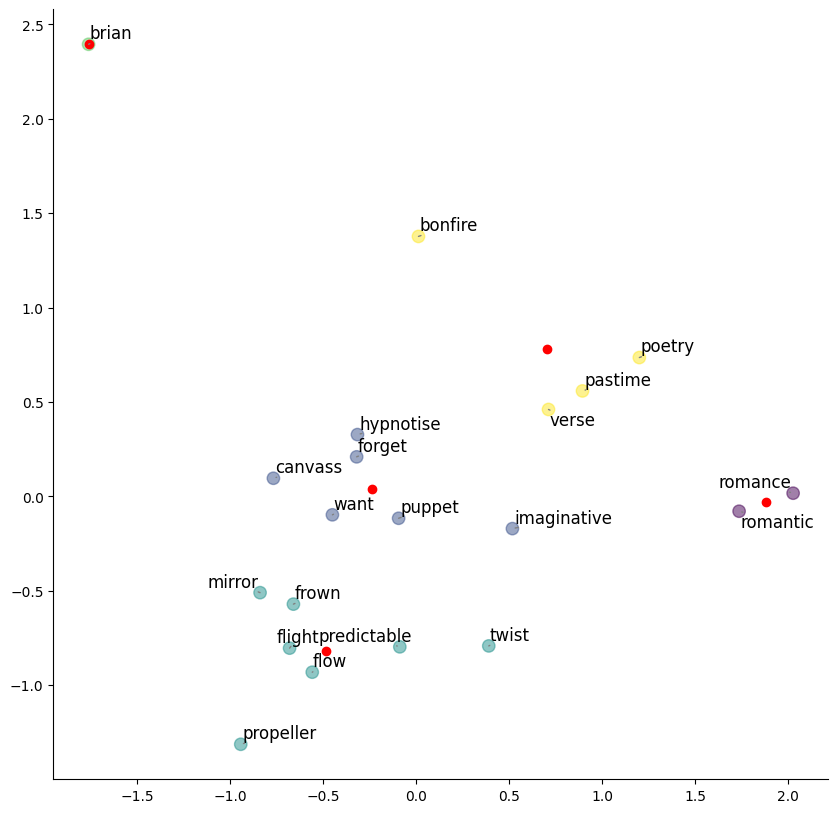

In [9]:
from model import cluster
import pandas as pd

df = pd.read_csv(f"./result/{address}.csv")
cluster.plot_one_per_song(df)
#cluster.plot_one_per_song(df,cluster_no=8, wv_model = model)

Another way:  
We choose the first 5 keywords for every song and sort them by frequency. So we have 500 keywords for 100 songs and we visualize the first 100 in the plot.    
The size of circle is the frequency of the word appear in 100 keywords.

word arabella dose not have vector
word propelleryou dose not have vector
word innovatoryou dose not have vector


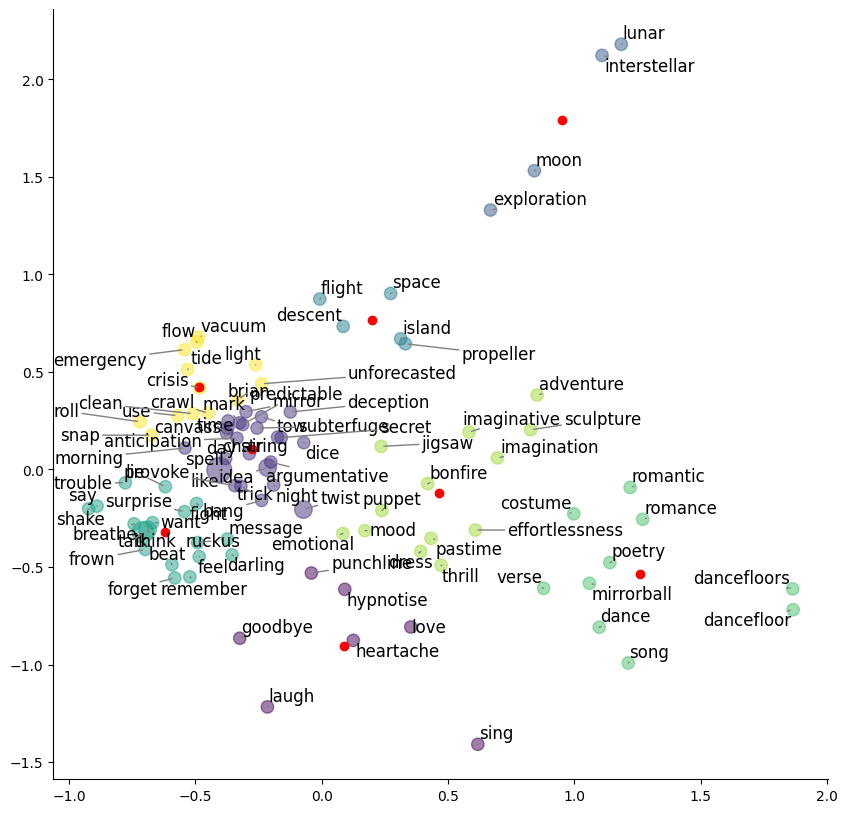

In [10]:
cluster.plot_five_per_song(df, cluster_no=8)
#cluster.plot_five_per_song(df,cluster_no=8, wv_model = model)

### Other visualization

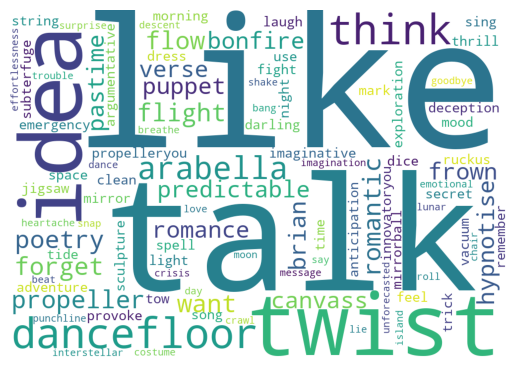

In [11]:
import pandas as pd
from data import analysis
from model import cluster

words = cluster.generate_word_list(pd.read_csv(f"./result/{address}.csv"), 5)
analysis.plot_word_cloud(words)

## Evaluation
The evaluation process is performed individually for each song within the specific dataset, namely the Billboard Hot 100 songs of 2018. In order to explore different configurations and refine the experiments, variations such as the application of stemming, removal of stopwords, and other adjustments are implemented. To mitigate the influence of random variations of specific songs, the evaluations are averaged over 100 songs, ensuring reliable and representative results.

### Title comparing:
This metric quantifies the cosine similarity score between a song title and a collection of topics linked to that song. To accomplish this task, we utilize the cosine similarity measure provided by scikit-learn. Specifically, we employ sentence embeddings generated from the 'all-mpnet-base-v2' model, employing the SBERT SentenceTransformers library to encode both the title and relevant keywords into their respective embeddings.

In [12]:
from evaluation.title_compare import get_score
import pandas as pd

df = pd.read_csv("result/experiments/bert_ff.csv") # First f: remove_stopwords = False; Second f: stemming = False
get_score(df)

Song: Gods Plan, Topics: ['trouble', 'wishing', 'tryna', 'like', 'mama'], Similarity:0.11087154597043991
Song: Perfect, Topics: ['darling', 'song', 'love', 'beautiful', 'baby'], Similarity:0.1290922909975052
Song: Meant To Be, Topics: ['baby', 'sing', 'ride', 'boy', 'road'], Similarity:0.1550377607345581
Song: Havana, Topics: ['havana', 'jeffery', 'babe', 'jam', 'bout'], Similarity:0.6415776014328003
Song: Rockstar, Topics: ['groupie', 'tank', 'band', 'homies', 'popstar'], Similarity:0.4657381772994995
Song: Psycho, Topics: ['mama', 'lil', 'yo', 'bitch', 'homies'], Similarity:0.16420279443264008
Song: I Like It, Topics: ['cardi', 'like', 'gucci', 'yo', 'baby'], Similarity:0.16363775730133057
Song: The Middle, Topics: ['kitchen', 'mess', 'cabinets', 'dishes', 'stairs'], Similarity:0.20410650968551636
Song: In My Feelings, Topics: ['trapmoneybenny', 'drake', 'trap', 'rap', 'ex'], Similarity:0.11067940294742584
Song: Believer, Topics: ['poems', 'believer', 'blood', 'heartache', 'grace'], 

0.26669463858008385

### c_umass (https://doi.org/10.30534/ijatcse/2020/231942020)
The assessment is done by employing the c_umass metric, which combines document co-occurrence counts, one-preceding segmentation, and logarithmic conditional probability.

In [13]:
from data.base import read_cleaned_data
from evaluation.cv_umass import evaluate
import pandas as pd

address = 2018

# u_mass test with our corpus
model_df = pd.read_csv(f"./result/experiments/tfidf_ff.csv")

lyrics_tokens = read_cleaned_data(address,remove_stopwords = False, stem_words = False)

print(evaluate(model_df,lyrics_tokens))
# evaluate(model_df,lyrics_tokens,method='umass')

-7.2098
